## Glass Dataset

The experiment has been done on the following dataset: https://sci2s.ugr.es/keel/dataset.php?cod=142
Key Points:
1. Binary Classification
2. 214 Datapointt

## Without using validation dataset

In [32]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import neighbors
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB

In [2]:
#10% of the dataset has been reserved for the test split
TEST_SPLIT = 0.9
NB_CLASSES = 2

In [3]:
X = []
Y = []

In [4]:
file = open('/home/bhavy/Dropbox/7th-semester/courses/ML/Assignments/self-experiments-on-different-datasets/glass-dataset-classification/glass1.dat', 'r')

In [5]:
data = file.read()

In [6]:
x = data.split('\n')

In [7]:
for i in range(len(x) - 1):
    flag = x[i].split(',')
    #print(int(flag[0:-1]))
    ls = list(map(float, flag[0:-1]))
    X.append(ls)
    if flag[-1] == ' negative':
        Y.append(0)
    else:
        Y.append(1)

In [8]:
# X and Y are features and labels
X = np.array(X).reshape(len(X), 9)
Y = np.array(Y).reshape(len(Y), 1)

In [9]:
dat = np.hstack((X, Y))

In [10]:
np.random.shuffle(dat)

In [11]:
X_train, y_train, X_test, y_test = dat[:int(TEST_SPLIT*len(dat)), :-1], dat[:int(TEST_SPLIT*len(dat)), -1], dat[int(TEST_SPLIT*len(dat)):, :-1], dat[int(TEST_SPLIT*len(dat)):, -1]

In [12]:
#using logistic regression 
model = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100)
clf =  model.fit(X_train, y_train)
clf.score(X_test, y_test)

0.5909090909090909

In [13]:
#using support vector maching
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8181818181818182

In [14]:
#using k-nearest neighbours
clf = neighbors.KNeighborsClassifier(NB_CLASSES)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7727272727272727

In [15]:
#using decision tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8181818181818182

In [16]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 200), random_state=1)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7727272727272727

In [33]:
clf = GaussianNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7727272727272727

In [34]:
dic = {"Logitstic \nRegression":  0.6363636363636364,
      "Support \nvector": 0.7727272727272727,
      "K-Nearest \n Neighbour": 0.9090909090909091,
      "Decision \n Tree": 0.7272727272727273,
      "Neural \n Network": 0.8181818181818182,
      "Gaussian \n Naive Bayes": 0.7727272727272727}

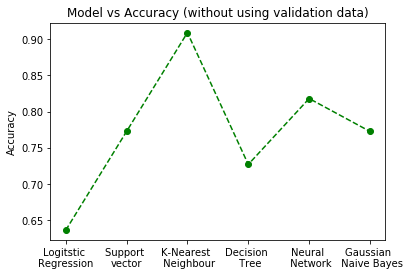

In [36]:
ls = []
ls2 = []
for idx, data_dict in enumerate(dic.items()):
    x = data_dict[0]
    y = data_dict[1]
    ls.append(x)
    ls2.append(y)
    
plt.plot(np.arange(6), ls2, '--go')
plt.xticks(np.arange(6), ls)
plt.ylabel('Accuracy')
plt.title('Model vs Accuracy (without using validation data)')
plt.savefig('Model-vs-Accuracy-(without-using-validation-data).png')

In [19]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [20]:
clf = KMeans(n_clusters=2, random_state=0)
kmeans = clf.fit(X)

In [21]:
label = kmeans.labels_

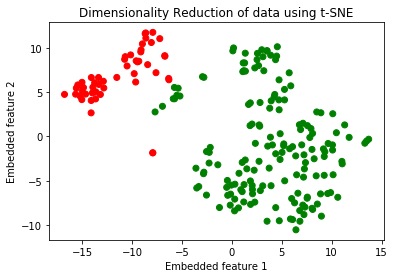

In [22]:
colors = ['red','green']
plt.scatter(X_embedded[:,0 ],X_embedded[:, 1], c = label, cmap=matplotlib.colors.ListedColormap(colors) )
plt.title("Dimensionality Reduction of data using t-SNE")
plt.xlabel('Embedded feature 1')
plt.ylabel('Embedded feature 2')
plt.savefig('Features-in-reduced-dimension.png')

## using validation data and hyperparameter optimization

https://scikit-learn.org/stable/modules/cross_validation.html

In [38]:
from sklearn.model_selection import cross_val_score

In [39]:
ls2 = []

In [40]:
#using logistic regression 
clf = LogisticRegression( random_state=0, solver='lbfgs', max_iter=100)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Mean Accuracy using 5-fold cross validation is:", scores.mean(), " with standard deviation is :", scores.std())
ls2.append(scores.mean())

Mean Accuracy using 5-fold cross validation is: 0.63  with standard deviation is : 0.02192912279578913


In [41]:
clf = svm.SVC(random_state=0)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Mean Accuracy using 5-fold cross validation is:", scores.mean(), " with standard deviation is :", scores.std())
ls2.append(scores.mean())

Mean Accuracy using 5-fold cross validation is: 0.7555263157894737  with standard deviation is : 0.08126595304710173


In [42]:
clf = neighbors.KNeighborsClassifier(NB_CLASSES)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Mean Accuracy using 5-fold cross validation is:", scores.mean(), " with standard deviation is :", scores.std())
ls2.append(scores.mean())

Mean Accuracy using 5-fold cross validation is: 0.7855263157894739  with standard deviation is : 0.07105263157894735


In [43]:
clf = tree.DecisionTreeClassifier()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Mean Accuracy using 5-fold cross validation is:", scores.mean(), " with standard deviation is :", scores.std())
ls2.append(scores.mean())

Mean Accuracy using 5-fold cross validation is: 0.713157894736842  with standard deviation is : 0.08421052631578946


In [44]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(20, 200), random_state=1)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Mean Accuracy using 5-fold cross validation is:", scores.mean(), " with standard deviation is :", scores.std())
ls2.append(scores.mean())

Mean Accuracy using 5-fold cross validation is: 0.6976315789473684  with standard deviation is : 0.1177477937639941


In [45]:
clf = GaussianNB()
scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Mean Accuracy using 5-fold cross validation is:", scores.mean(), " with standard deviation is :", scores.std())
ls2.append(scores.mean())

Mean Accuracy using 5-fold cross validation is: 0.608157894736842  with standard deviation is : 0.09462127453996733


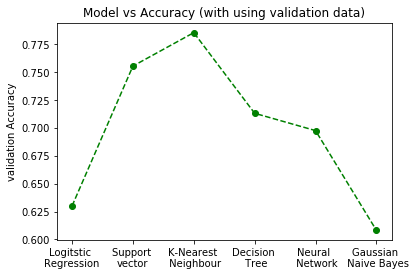

In [46]:
plt.plot(np.arange(6), ls2, '--go')
plt.xticks(np.arange(6), ls)
plt.ylabel('validation Accuracy')
plt.title('Model vs Accuracy (with using validation data)')
plt.savefig('Model-vs-Accuracy-(with-using-validation-data).png')

### Look how using the cross validation changed the performance of model. Earlier we have directly used our model on the test data without using validation data. Now we have checked our performance only on validation data and reserved the test data for final test. Cross validation is helpful in terms  of model selection

## Evaluation metrics

1. accuracy 
2. recall
3. precision

## Hyperparameter tuning

https://scikit-learn.org/stable/modules/grid_search.html

In [31]:
clf.get_params()

{'activation': 'relu',
 'alpha': 1e-05,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (20, 200),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_iter': 200,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}